# Importing libraries

In [20]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torchvision import transforms, datasets, models
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
import torch.nn.functional as F
import numpy as np

# Creating directories

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
data_dir = r'C:\\Users\\\user\\OneDrive\\Desktop\\\Dataset' 
testing_dir = r'C:\\Users\\\user\\OneDrive\\Desktop\\\Test_dataset' 

# Transformation

In [23]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])


In [24]:
dataset = datasets.ImageFolder(data_dir, transform=transform) 
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(testing_dir, transform=transform) 
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

# Labeling + checking if it's correctly labeled

In [25]:
def check_labels(data_dir):
    img_paths = []
    labels = []

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.png') or file.endswith('.jpg'):
                img_path = os.path.join(root, file)
                img_paths.append(img_path)

                if 'Non_Demented' in img_path:
                    labels.append(0)
                elif 'Very_Mild_Demented' in img_path:
                    labels.append(1)
                else:
                    labels.append(2)
           

    for i in range(len(labels)):
        if labels[i] != i:
            print(f"Label for image {img_paths[i]} is incorrect.")

if __name__ == "__main__":
    data_dir = "data/"
    check_labels(data_dir)

In [26]:
def check_labels(testing_dir):
    img_paths = []
    labels = []

    for root, dirs, files in os.walk(testing_dir):
        for file in files:
            if file.endswith('.png') or file.endswith('.jpg'):
                img_path = os.path.join(root, file)
                img_paths.append(img_path)

                if 'Non_Demented' in img_path:
                    labels.append(0)
                elif 'Very_Mild_Demented' in img_path:
                    labels.append(1)
                else:
                    labels.append(2)
           

    for i in range(len(labels)):
        if labels[i] != i:
            print(f"Label for image {img_paths[i]} is incorrect.")

if __name__ == "__main__":
    testing_dir = "data/"
    check_labels(testing_dir)

# Model

In [27]:
model = models.densenet121(pretrained=True).to(device)

# Training

In [28]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [29]:
losses = []
for epoch in range(20):

  print(f"Epoch {epoch+1}")
  
  for inputs, labels in dataloader:
        # Forward pass
            outputs = model(inputs).to(device)
            loss = criterion(outputs, labels).to(device)

            losses.append(loss.detach().numpy())
            print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


Epoch 1
Epoch 1, Loss: 8.4149
Epoch 1, Loss: 7.2173
Epoch 1, Loss: 5.2769
Epoch 1, Loss: 3.3938
Epoch 1, Loss: 3.4139
Epoch 1, Loss: 1.9071
Epoch 1, Loss: 1.5086
Epoch 1, Loss: 1.2454
Epoch 1, Loss: 0.8820
Epoch 1, Loss: 0.8894
Epoch 1, Loss: 1.2764
Epoch 1, Loss: 1.0813
Epoch 1, Loss: 0.7172
Epoch 1, Loss: 0.8445
Epoch 1, Loss: 0.8681
Epoch 1, Loss: 0.6078
Epoch 1, Loss: 1.0666
Epoch 1, Loss: 0.7316
Epoch 1, Loss: 0.8361
Epoch 1, Loss: 0.8076
Epoch 1, Loss: 1.1610
Epoch 1, Loss: 0.7105
Epoch 1, Loss: 0.7406
Epoch 1, Loss: 0.7008
Epoch 1, Loss: 0.9640
Epoch 1, Loss: 0.7062
Epoch 1, Loss: 0.7678
Epoch 1, Loss: 0.8446
Epoch 1, Loss: 0.8020
Epoch 1, Loss: 0.9867
Epoch 1, Loss: 0.7362
Epoch 1, Loss: 0.6652
Epoch 1, Loss: 0.6210
Epoch 1, Loss: 0.8452
Epoch 1, Loss: 0.7564
Epoch 1, Loss: 0.9529
Epoch 1, Loss: 0.6593
Epoch 1, Loss: 0.5085
Epoch 1, Loss: 0.8271
Epoch 1, Loss: 0.5127
Epoch 1, Loss: 0.9381
Epoch 1, Loss: 0.8027
Epoch 1, Loss: 0.5063
Epoch 1, Loss: 0.8417
Epoch 1, Loss: 0.6022
Ep

# Testing

In [33]:
correct = 0
total = 0
        
with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

# Score

In [34]:
correct/total

0.7495682210708118

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


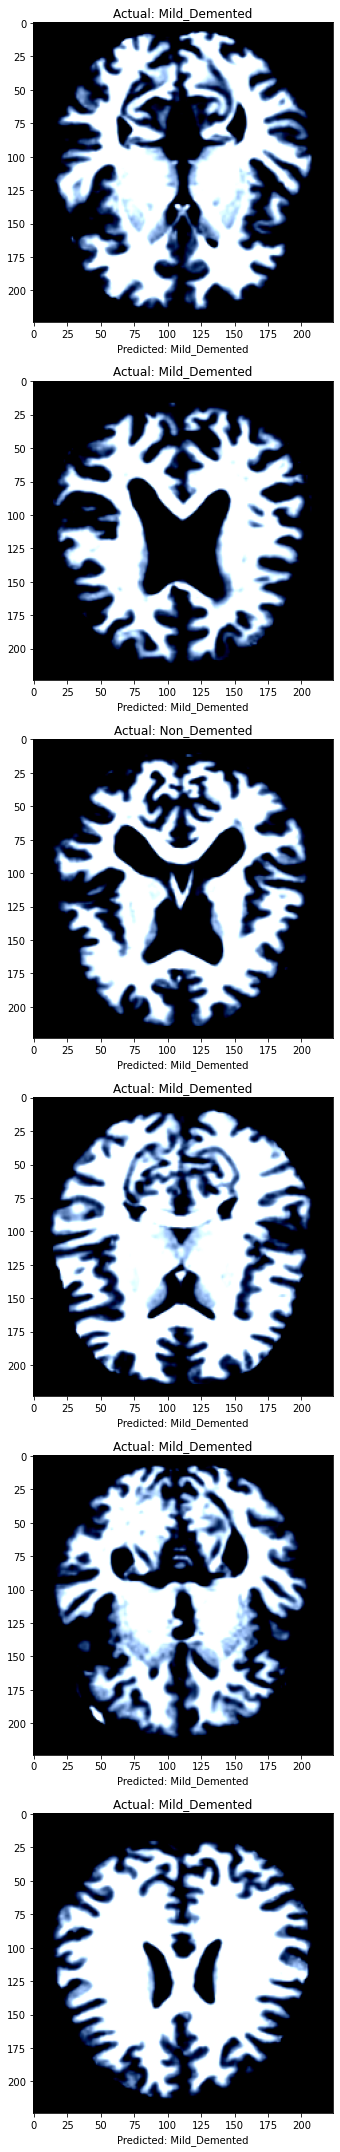

In [43]:
categories = ['Very_Mild_Demented', 'Mild_Demented', 'Non_Demented']

num_images = 6

fig, axs = plt.subplots(nrows=num_images, ncols=1, figsize=(5, num_images*5))

for i in range(num_images):

  index = random.randint(0, len(dataset)-1)

  img, label = dataset[index]

  ax = axs[i]
  ax.imshow(img.permute(1,2,0))
  ax.set_title(f"Actual: {categories[label]}")

  prediction = model(img.unsqueeze(0))
  predicted_label = prediction.argmax()
  
  # Check predicted label index
  if 0 <= predicted_label < len(categories):
    ax.set_xlabel(f"Predicted: {categories[predicted_label]}")
  else:
    ax.set_xlabel("Invalid prediction")

plt.tight_layout()